## Customer segmentation

### k-means clustering

In [1]:
import pandas as pd

# load the dataset
file_path = "C:/Users/Acer/Documents/work/____Portfolio/Segmentation/K-means clustering/Mall_Customers.csv"
df = pd.read_csv(file_path)

# preview the dataset
print(df.head())

# basic information about the dataset
print(df.info())
print(df.describe())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

In [2]:
# check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column: ")
print(missing_values)

Missing values in each column: 
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


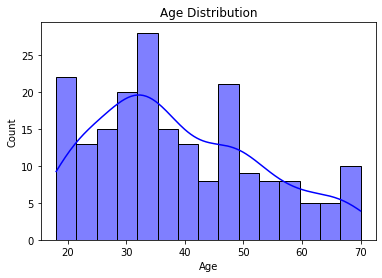

Text(0.5, 1.0, 'Spending Score vs. Annual Income')

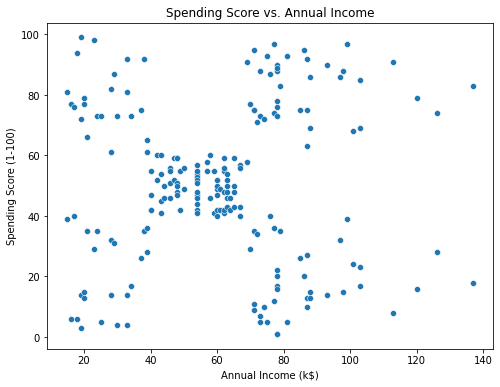

In [3]:
# exploratory data analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# distribution of Age
sns.histplot(df['Age'], kde = True, bins = 15, color = 'blue')
plt.title('Age Distribution')
plt.show()

# Spending Score vs. Annual Income
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.title('Spending Score vs. Annual Income')

In [5]:
from sklearn.preprocessing import StandardScaler

# selecting relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

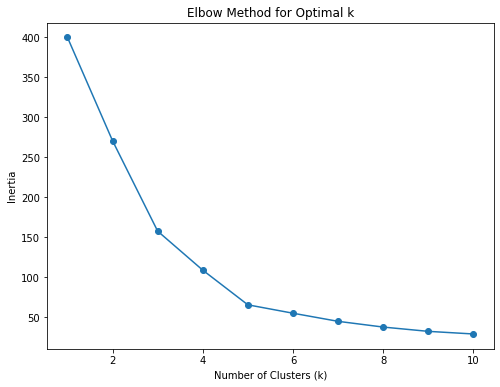

In [6]:
# k-means clustering

from sklearn.cluster import KMeans
import numpy as np

# determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize = (8, 6))
plt.plot(k_values, inertia, marker = 'o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show

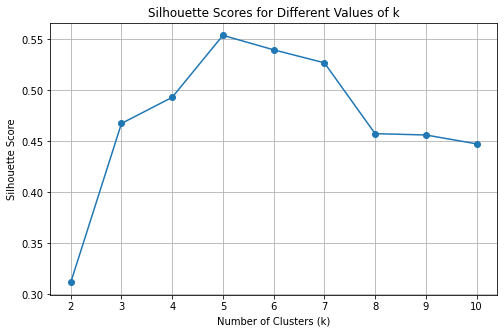

The optimal number of clusters based on silhouette score is: 5


In [11]:
# Silhouette Score

from sklearn.metrics import silhouette_score

# range of k values to evaluate
k_values = range(2, 11)
silhouette_scores = []

# calculating silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker = 'o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# find the optimal k
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f'The optimal number of clusters based on silhouette score is: {optimal_k}')

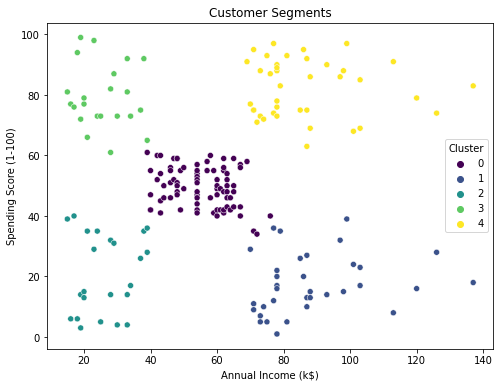

In [8]:
# fitting the model with the optimal number of clusters 
kmeans = KMeans(n_clusters = 5, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# visualize the clusters
plt.figure(figsize = (8, 6))
sns.scatterplot(
    x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
    hue = 'Cluster', data = df, palette = 'viridis'
)
plt.title('Customer Segments')
plt.show()

In [10]:
# analyze clusters

# group by cluster and calculate mean values
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

# count of customers per cluster
print(df['Cluster'].value_counts())

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        41.114286           88.200000               17.114286
2        45.217391           26.304348               20.913043
3        25.272727           25.727273               79.363636
4        32.692308           86.538462               82.128205
0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64


Cluster Analysis:\
Cluster 0:

Average Age: 42.72 years
Annual Income: $55.30k
Spending Score: 49.52
Interpretation:
This group represents individuals with moderate income and average spending.
They are likely careful spenders or middle-of-the-road consumers who don't overspend but aren't overly frugal either.

Cluster 1:
Average Age: 41.11 years
Annual Income: $88.20k
Spending Score: 17.11
Interpretation:
These are high-income earners with low spending scores.
This indicates a group that is financially well-off but conservative in spending, possibly preferring to save or invest rather than spend on luxury or discretionary items.

Cluster 2:
Average Age: 45.22 years
Annual Income: $26.30k
Spending Score: 20.91
Interpretation:
This group has low income and low spending scores.
Likely represents budget-conscious individuals or those with limited disposable income, focusing on essentials and avoiding discretionary spending.

Cluster 3:
Average Age: 25.27 years
Annual Income: $25.73k
Spending Score: 79.36
Interpretation:
These are younger individuals with low income but high spending scores.
They may represent aspirational or impulsive consumers, spending a significant portion of their income on discretionary or luxury items.

Cluster 4:
Average Age: 32.69 years
Annual Income: $86.54k
Spending Score: 82.13
Interpretation:
This cluster includes high-income individuals with high spending scores.
Likely luxury-oriented or affluent consumers who are willing to spend significantly on non-essential items and lifestyle.

Overall Insight:
High-income, low-spending cluster (Cluster 1) contrasts with high-income, high-spending cluster (Cluster 4), showcasing different financial behaviors within high earners.
Cluster 3 (low income, high spending) might represent a group to target for financial education or tailored products to manage spending.
Cluster 0 (moderate income, average spending) likely reflects the middle-class segment with balanced financial behavior.
Cluster 2 (low income, low spending) might benefit from value-oriented marketing strategies focusing on essentials.